In [1]:
from neps.space.neps_spaces.parameters import PipelineSpace, Operation, Categorical, Resampled, Integer, Fidelity
import neps

# Define the NEPS space for the neural network architecture
class SimpleSpace(PipelineSpace):
    int_param1 = Fidelity(Integer(1,100))
    int_param2 = Integer(1,100, prior=50, prior_confidence="medium")
    int_param3 = Integer(1,100, prior=50, prior_confidence="high")
    cat = Categorical(['option1', 'option2', 'option3'])#, prior=0, prior_confidence='low')
global_values = []
def evaluate_pipeline(int_param1, int_param2,  *args, **kwargs):
    # Dummy evaluation function
    global_values.append(int_param1)
    return {"objective_to_minimize": -int_param2/50 + int_param1,
            "cost": int_param1}

c:\Users\Amega\Git\neps\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from neps.optimizers.utils.grid import make_grid
from pprint import pprint
from functools import partial

# pprint(make_grid(SimpleSpace(), size_per_numerical_hp=2, ignore_fidelity=False))

neps.run(
    evaluate_pipeline,
    SimpleSpace(),
    root_directory="neps_test_runs/algo_tests",
    overwrite_root_directory=True,
    optimizer=partial(neps.algorithms.hyperband),#, ignore_fidelity=True, size_per_numerical_dimension=5),
    # fidelities_to_spend=40,
    cost_to_spend=20
)
neps.status("neps_test_runs/algo_tests",print_summary=True)
print()

# Configs: 20

    success: 20

# Best Found (config 17_rung_0):

    objective_to_minimize: -1.0
    config: {'int_param2': 100, 'int_param3': 54, 'cat': 'option3', 'int_param1': 1}
    path: C:\Users\Amega\Git\neps\neps_examples\basic_usage\neps_test_runs\algo_tests\configs\config_17_rung_0
    cost: 1.0



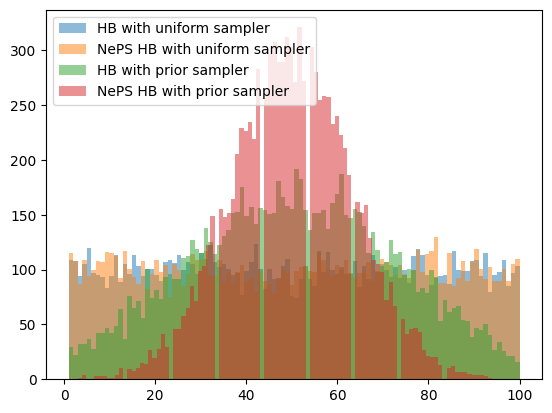

In [13]:
from neps import algorithms
import matplotlib.pyplot as plt
values=[]
for _ in range(10000):
    values.append(algorithms.hyperband(SimpleSpace(),sampler="uniform")({},None).config["int_param3"])
    values.append(algorithms.neps_hyperband(SimpleSpace(),sampler="uniform")({},None).config['SAMPLING__Resolvable.int_param3::integer__1_100_False'])
    values.append(algorithms.hyperband(SimpleSpace(),sampler="prior")({},None).config["int_param3"])
    values.append(algorithms.neps_hyperband(SimpleSpace(),sampler="prior")({},None).config['SAMPLING__Resolvable.int_param3::integer__1_100_False'])

plt.hist([v for n,v in enumerate(values) if n % 4 == 0], alpha=0.5, label='HB with uniform sampler',bins=100)
plt.hist([v for n,v in enumerate(values) if n % 4 == 1], alpha=0.5, label='NePS HB with uniform sampler',bins=100)
plt.hist([v for n,v in enumerate(values) if n % 4 == 2], alpha=0.5, label='HB with prior sampler',bins=100)
plt.hist([v for n,v in enumerate(values) if n % 4 == 3], alpha=0.5, label='NePS HB with prior sampler',bins=100)
plt.legend()
plt.show()

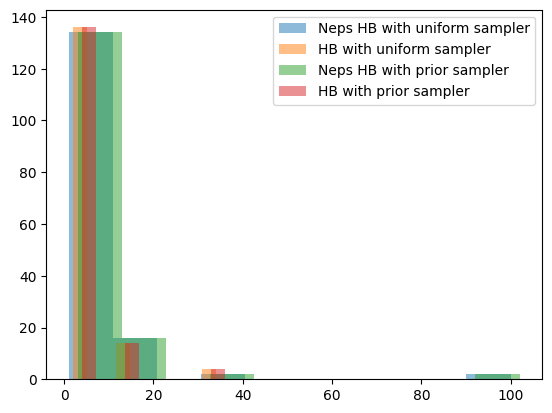

In [13]:
import neps
from neps import algorithms
from functools import partial
import matplotlib.pyplot as plt
global_values = []
eta=3
for algo in [partial(algorithms.neps_hyperband, eta=eta), 
             partial(algorithms.hyperband, eta=eta), 
             partial(algorithms.neps_hyperband, sampler="prior", eta=eta), 
             partial(algorithms.hyperband, sampler="prior", eta=eta)]:
    neps.run(
        evaluate_pipeline,
        SimpleSpace(),
        root_directory="neps_test_runs/algo_tests",
        overwrite_root_directory=True,
        optimizer=algo,
        fidelities_to_spend=600
    )

plt.hist([v for n,v in enumerate(global_values) if n % 4 == 0], alpha=0.5, label='Neps HB with uniform sampler',bins=10)
plt.hist([v+1 for n,v in enumerate(global_values) if n % 4 == 1], alpha=0.5, label='HB with uniform sampler',bins=10)
plt.hist([v+2 for n,v in enumerate(global_values) if n % 4 == 2], alpha=0.5, label='Neps HB with prior sampler',bins=10)
plt.hist([v+3 for n,v in enumerate(global_values) if n % 4 == 3], alpha=0.5, label='HB with prior sampler',bins=10)
plt.legend()
plt.show()


In [14]:
for i in range(4):
    for j in [v for v in range(100) if v in global_values]:
        print(f"Count of {j:<3} in algo {i}: ", [v for n,v in enumerate(global_values) if n % 4 == i].count(j))


Count of 1   in algo 0:  82
Count of 3   in algo 0:  52
Count of 11  in algo 0:  16
Count of 33  in algo 0:  2
Count of 1   in algo 1:  80
Count of 3   in algo 1:  56
Count of 11  in algo 1:  14
Count of 33  in algo 1:  4
Count of 1   in algo 2:  82
Count of 3   in algo 2:  52
Count of 11  in algo 2:  16
Count of 33  in algo 2:  2
Count of 1   in algo 3:  80
Count of 3   in algo 3:  56
Count of 11  in algo 3:  14
Count of 33  in algo 3:  4
